In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('../dataset/pca.csv')
data.head()

,Unnamed: 0,PCA_1,PCA_2,PCA_3
0,0,0.251401,-1.147706,-1.004114
1,1,0.262601,-0.856168,-1.170889
2,2,0.588701,5.581439,-4.077328
3,3,0.193096,-0.625925,-0.915479
4,4,0.246030,-0.806903,-0.609864


In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,PCA_1,PCA_2,PCA_3
0,0.251401,-1.147706,-1.004114
1,0.262601,-0.856168,-1.170889
2,0.588701,5.581439,-4.077328
3,0.193096,-0.625925,-0.915479
4,0.246030,-0.806903,-0.609864


In [4]:
data.describe()

,PCA_1,PCA_2,PCA_3
count,6.552900e+04,6.552900e+04,6.552900e+04
mean,-3.730054e-17,-3.122836e-17,-1.236123e-17
std,1.329500e+00,1.269141e+00,1.155059e+00
min,-7.897327e-01,-1.510090e+00,-1.671438e+01
25%,-1.869833e-01,-8.036895e-01,-6.613555e-01
50%,-8.975068e-02,-5.193081e-01,3.177221e-01
75%,1.528751e-01,5.756673e-01,6.884762e-01
max,1.597263e+02,1.698870e+01,3.324083e+01


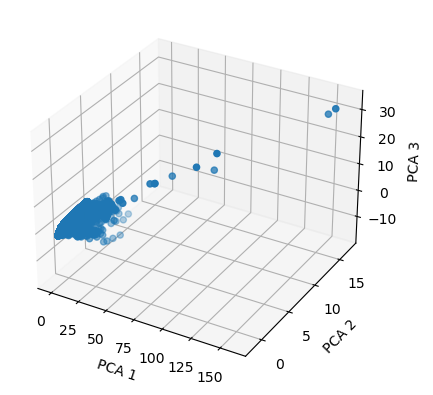

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['PCA_1'], data['PCA_2'], data['PCA_3'])

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()

In [6]:
data = data[data['PCA_1'] < 5]

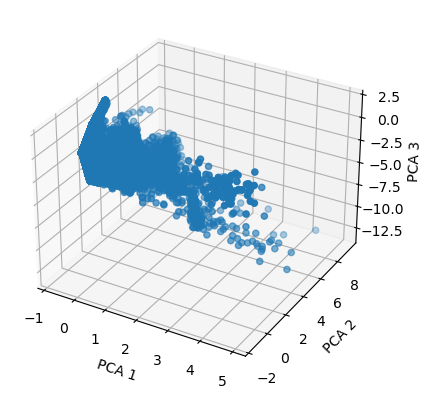

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['PCA_1'], data['PCA_2'], data['PCA_3'])

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=['PCA_1', 'PCA_2', 'PCA_3'])
data.describe()

,PCA_1,PCA_2,PCA_3
count,65366.000000,65366.000000,65366.000000
mean,0.130654,0.137652,0.876433
std,0.066716,0.115330,0.074218
min,0.000000,0.000000,0.000000
25%,0.104601,0.064469,0.832552
50%,0.121249,0.090376,0.897683
75%,0.163324,0.190206,0.922491
max,1.000000,1.000000,1.000000


In [9]:
data.to_csv('../dataset/clustering.csv')

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_clusters(k):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': '3d'})

    ax = axes[0]
    for c in np.unique(kmeans.labels_):
        elems = data[kmeans.labels_ == c]
        ax.scatter(elems['PCA_1'], elems['PCA_2'], elems['PCA_3'], label=f'Cluster {c}')

    ax.set_xlabel('PCA_1')
    ax.set_ylabel('PCA_2')
    ax.set_zlabel('PCA_3')

    ax.set_title(f'{k} clusters (View 1)')
    ax.legend()

    ax = axes[1]
    for c in np.unique(kmeans.labels_):
        elems = data[kmeans.labels_ == c]
        ax.scatter(elems['PCA_1'], elems['PCA_2'], elems['PCA_3'], label=f'Cluster {c}')

    ax.view_init(azim=60)
    ax.set_xlabel('PCA_1')
    ax.set_ylabel('PCA_2')
    ax.set_zlabel('PCA_3')

    ax.set_title(f'{k} clusters (View 2)')
    ax.legend()

    plt.tight_layout()
    plt.show()

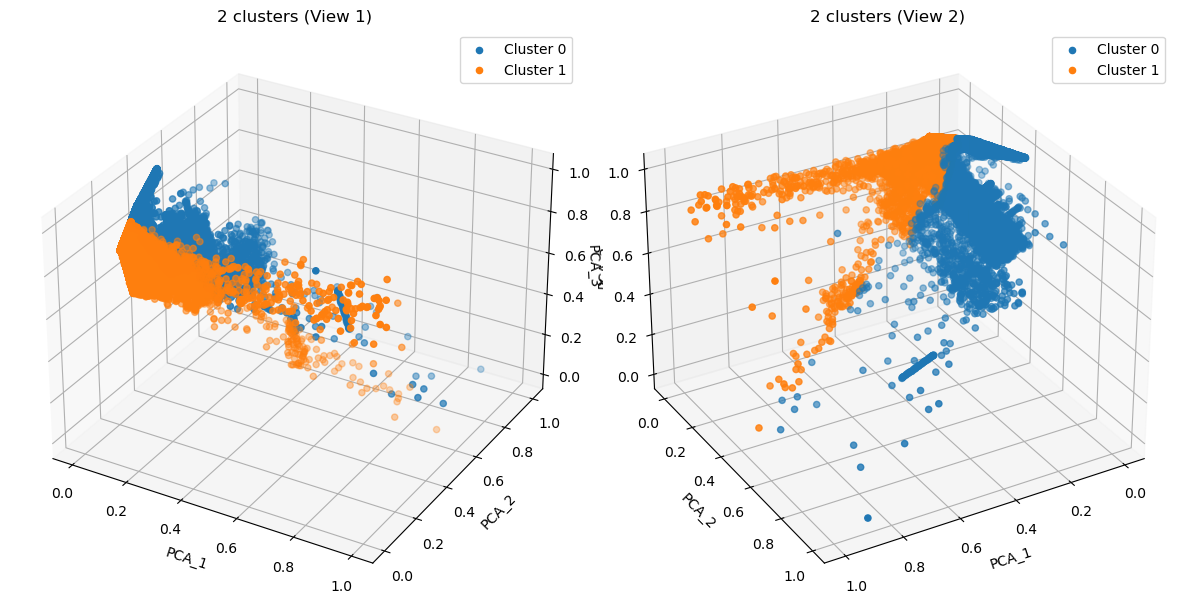

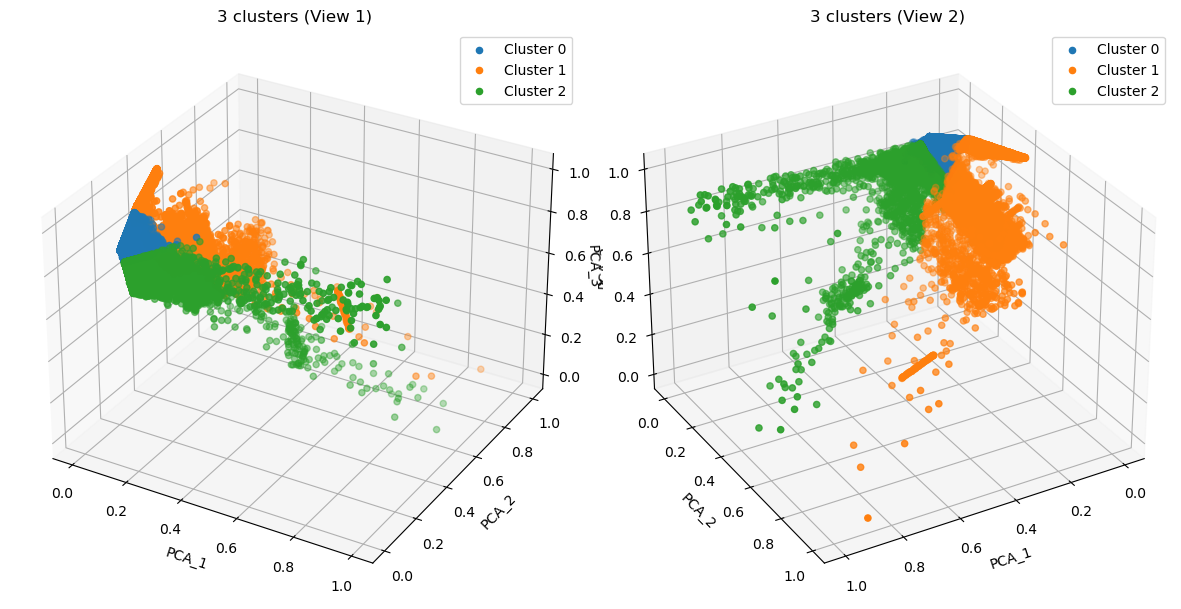

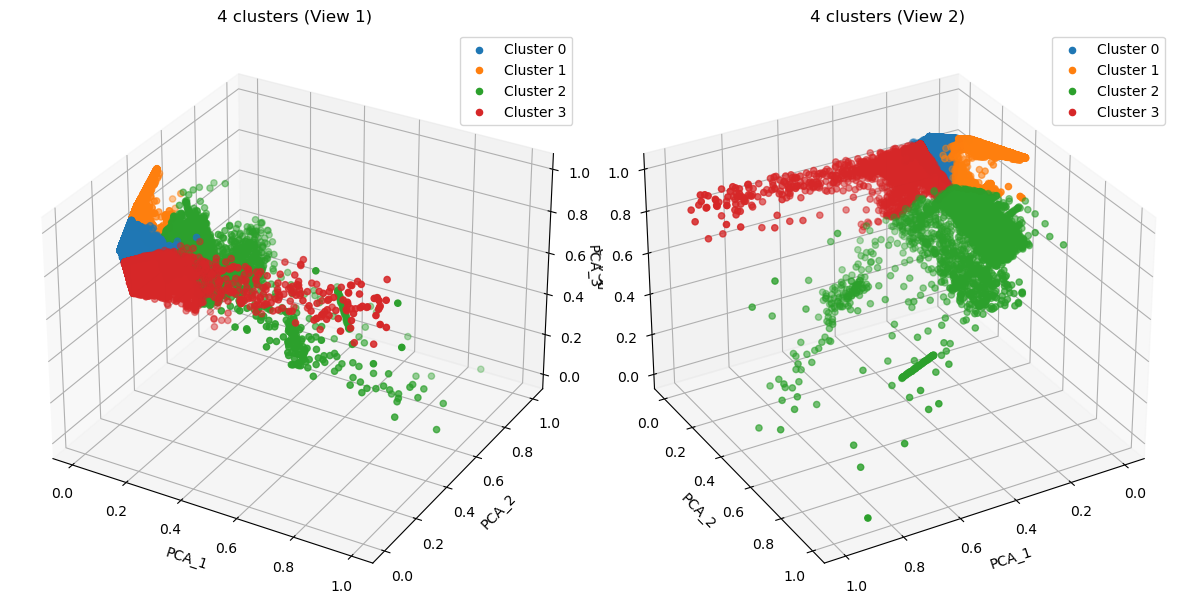

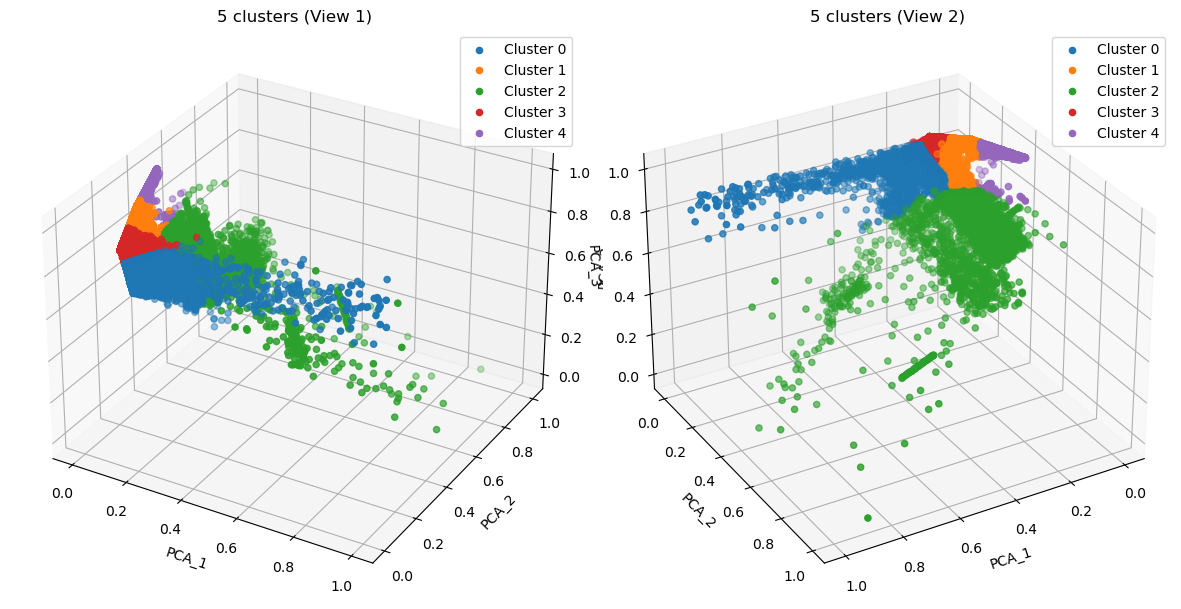

In [11]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2,6):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(data)
    plot_clusters(k)
    silhouette_avg = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

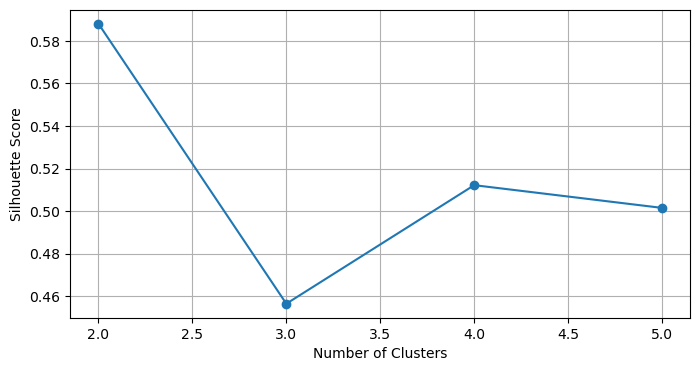

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(range(2,6), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [16]:
def plot_clusters(data, centers, labels, feature_names, alg_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': '3d'})

    # First plot
    ax = axes[0]
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='X', label='centroids', color="black")

    for c in np.unique(labels):
        elems = data[labels == c]
        ax.scatter(elems[feature_names[0]], elems[feature_names[1]], elems[feature_names[2]], label=c)

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_zlabel(feature_names[2])
    ax.set_title('{} {} clusters (View 1)'.format(alg_name, len(centers)))
    ax.legend()

    # Second plot
    ax = axes[1]
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='X', label='centroids', color="black")

    for c in np.unique(labels):
        elems = data[labels == c]
        ax.scatter(elems[feature_names[0]], elems[feature_names[1]], elems[feature_names[2]], label=c)

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_zlabel(feature_names[2])
    ax.view_init(azim=60)
    ax.set_title('{} {} clusters (View 2)'.format(alg_name, len(centers)))
    ax.legend()

    plt.tight_layout()
    plt.show()


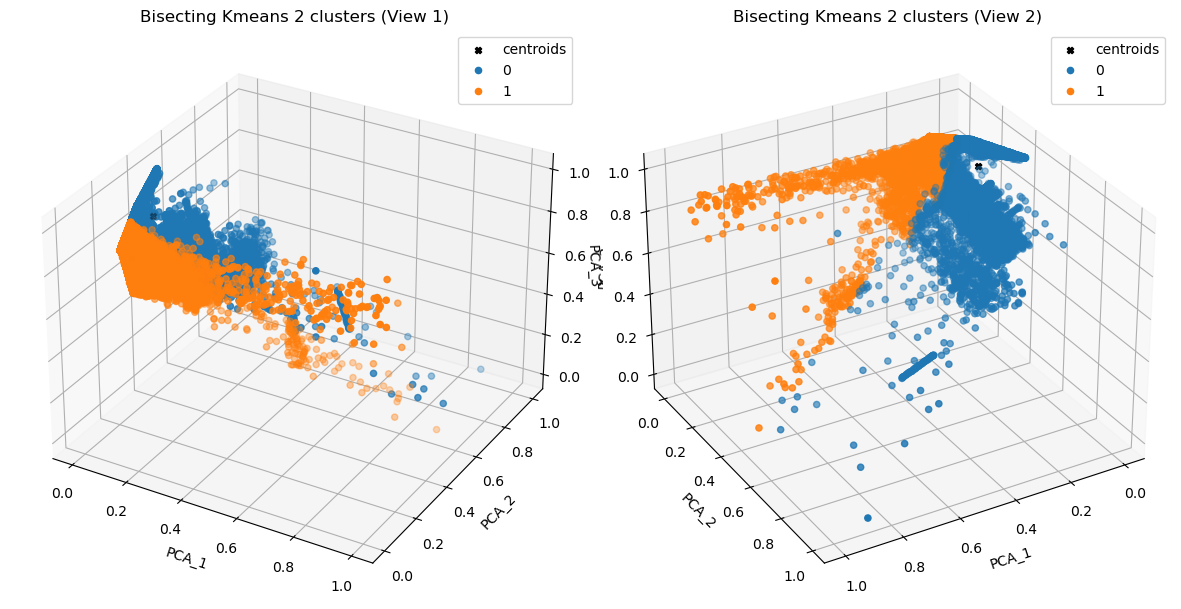

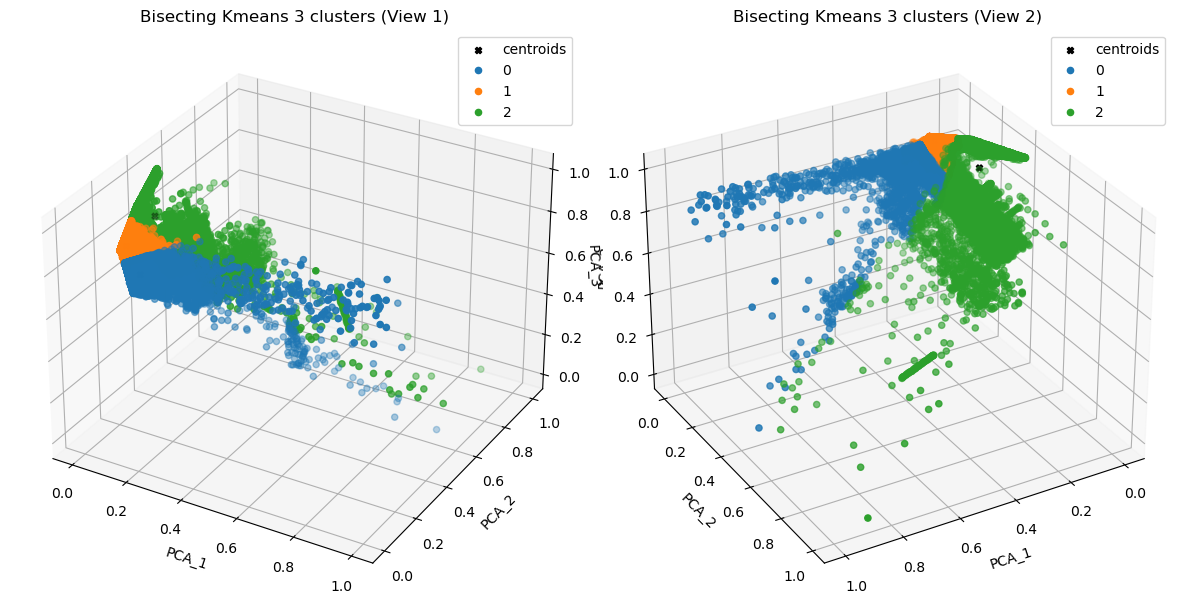

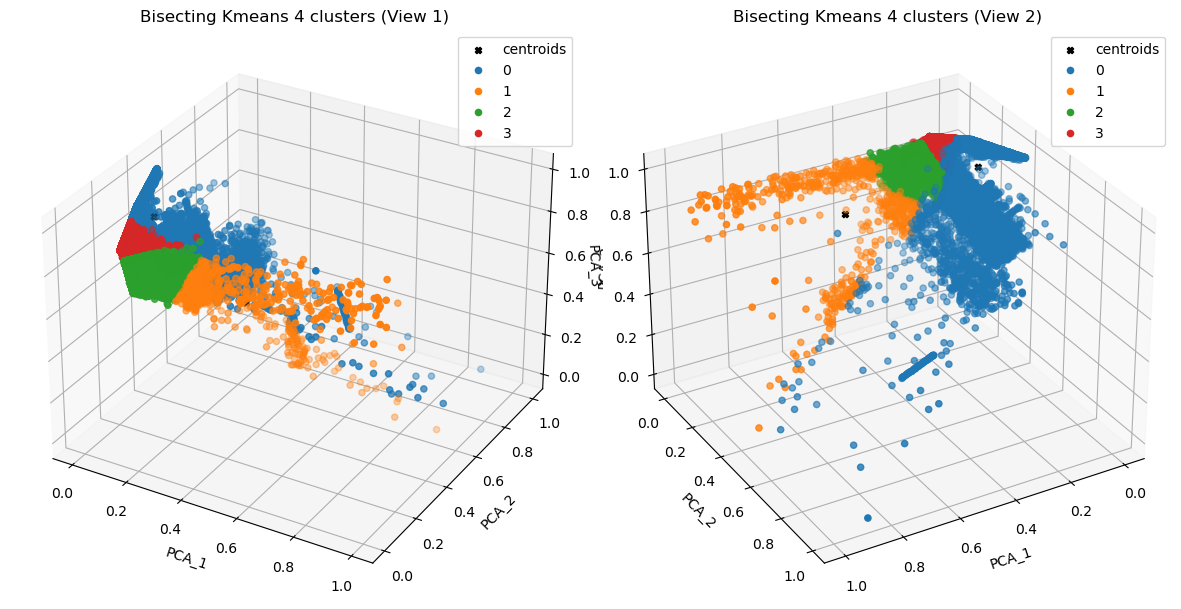

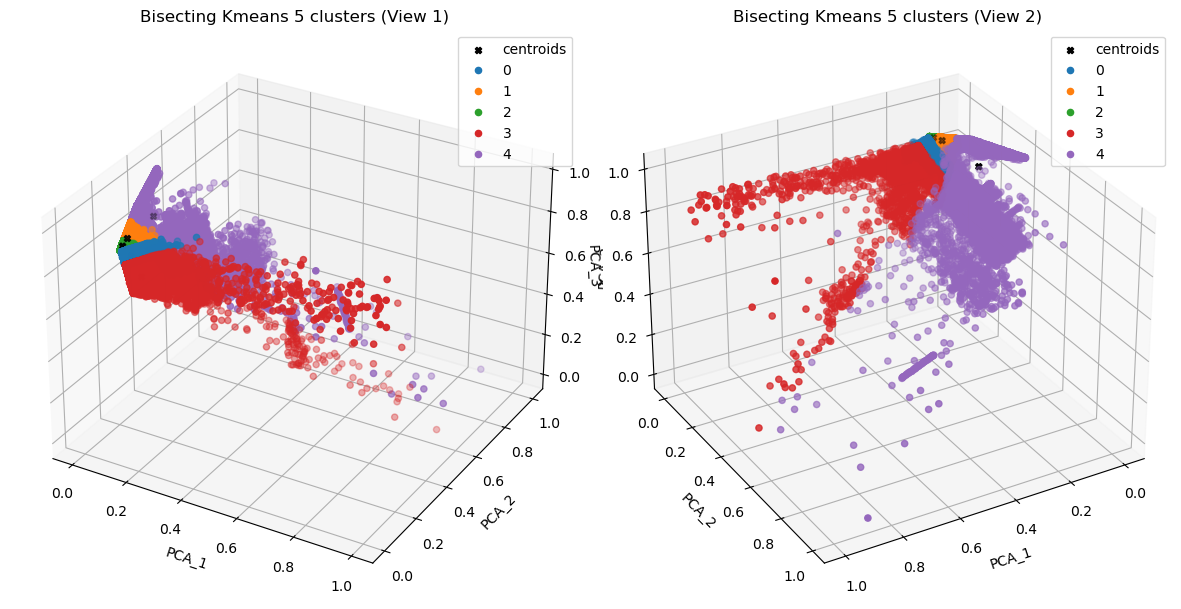

In [21]:
from sklearn. cluster import BisectingKMeans

silhouette_scores = []

for k in range(2,6):
    bkmeans = BisectingKMeans(n_clusters=k,bisecting_strategy='largest_cluster')
    bkmeans.fit(data)
    plot_clusters(data, bkmeans.cluster_centers_, bkmeans.labels_, data.columns, "Bisecting Kmeans")